In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data (1).csv


In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [20]:
import pandas as pd
import io

df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [21]:
df1.shape

(13320, 9)

In [22]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [23]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [24]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

Dropping less relevant features to simplify our model



In [25]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape


(13320, 5)

Data Preprocessing

In [26]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [27]:
df2.shape

(13320, 5)

In [28]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [29]:
df3.shape

(13246, 5)

Size

In [30]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

<ipython-input-31-681cf3aca53d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

total_sqft

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [34]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


Feature Engineering

In [36]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [38]:
df5.to_csv("bhp.csv",index=False)

Locations-Dimension Reduction



In [39]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [40]:
location_stats.values.sum()

13200

In [41]:
len(location_stats[location_stats>10])

240

In [42]:
len(location_stats)

1287

In [43]:
len(location_stats[location_stats<=10])

1047

In [44]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [45]:
len(df5.location.unique())

1287

In [46]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [47]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Removal

In [48]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [49]:
df5.shape

(13200, 7)

In [50]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

Price per sqft

In [51]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [52]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape


(10242, 7)

Visualization¶
2 BHK and 3 BHK property prices distribution for a given location

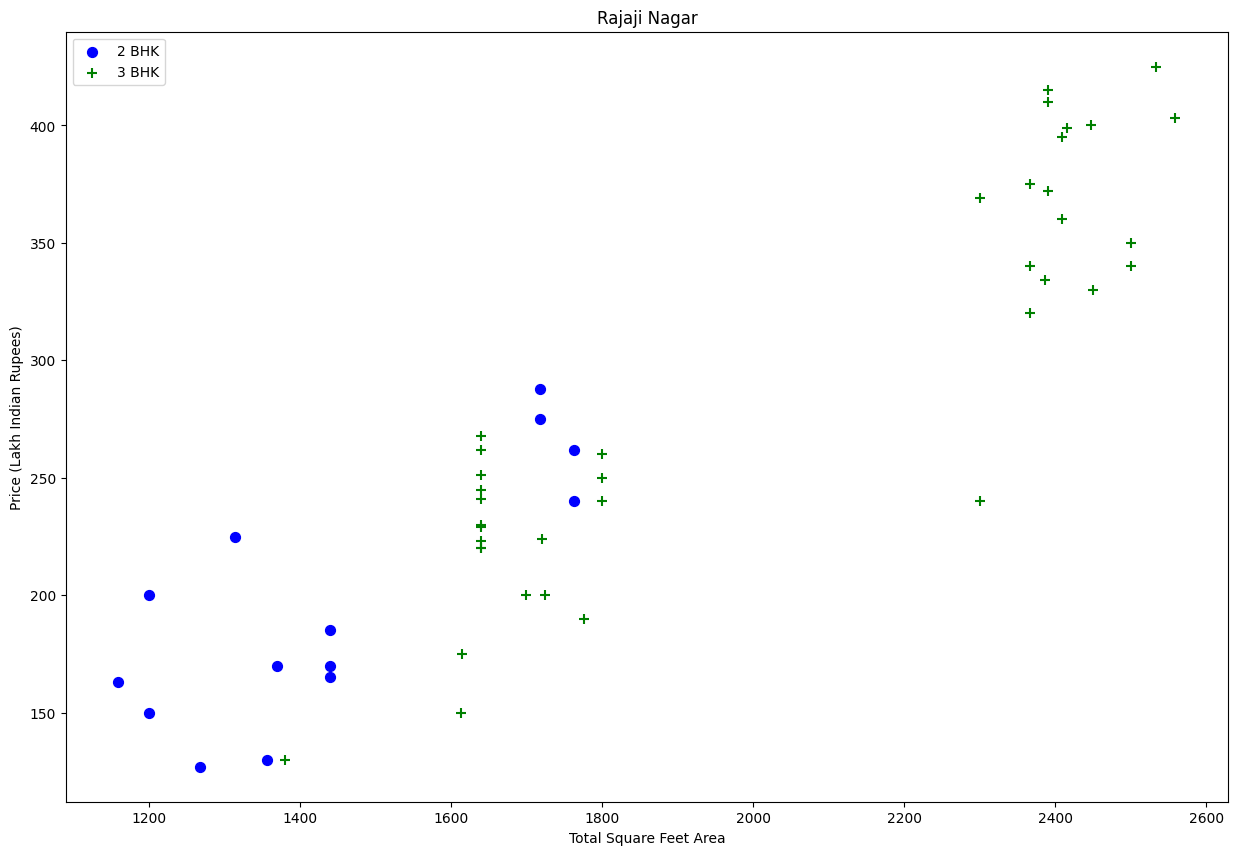

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

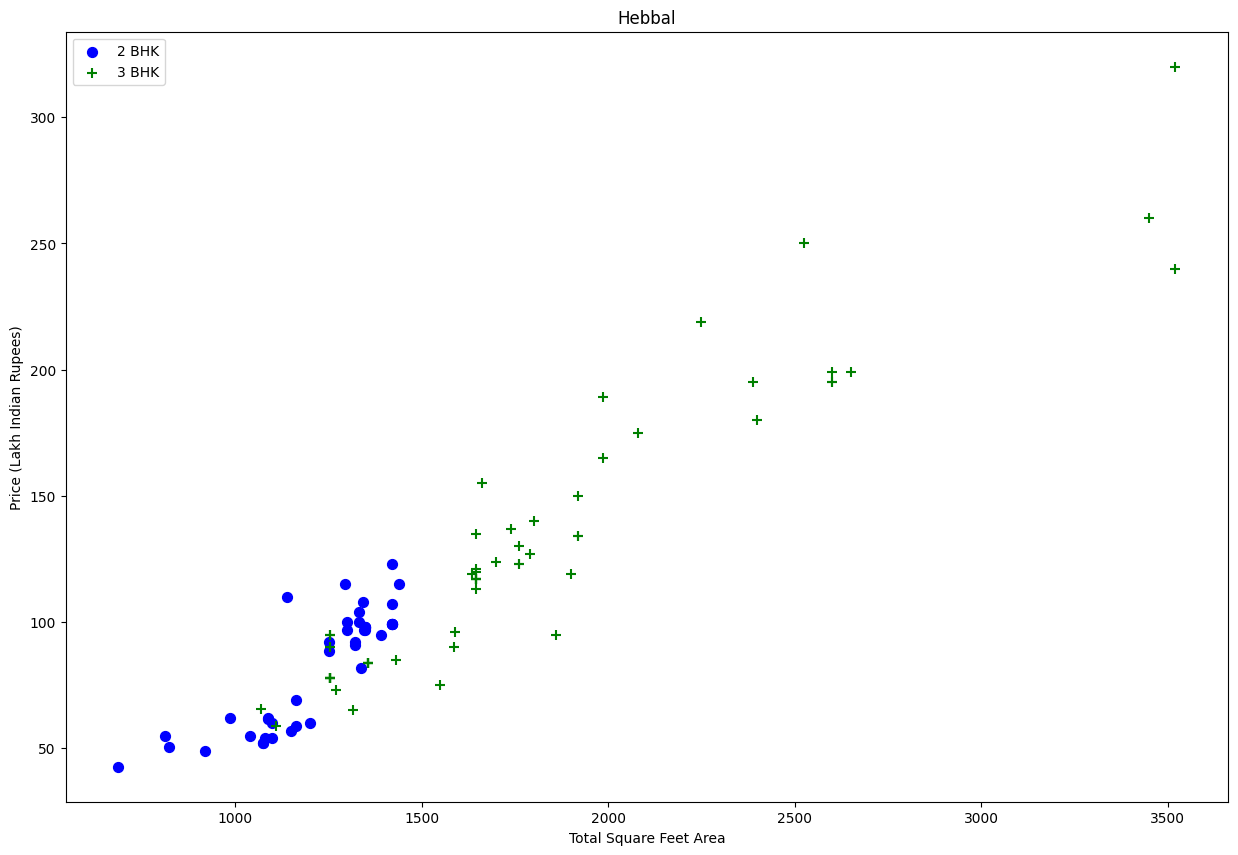

In [54]:
plot_scatter_chart(df7,"Hebbal")

In [57]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [58]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

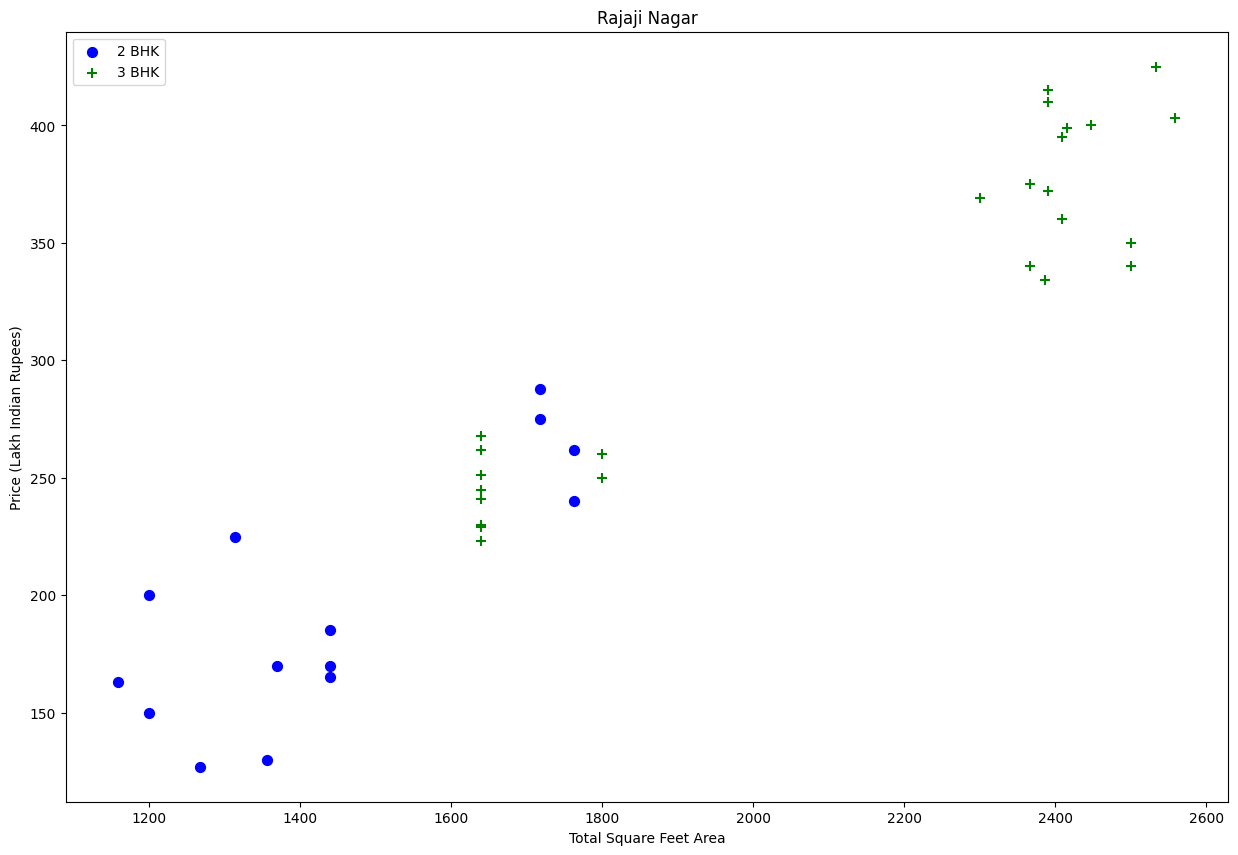

In [59]:
plot_scatter_chart(df8,"Rajaji Nagar")

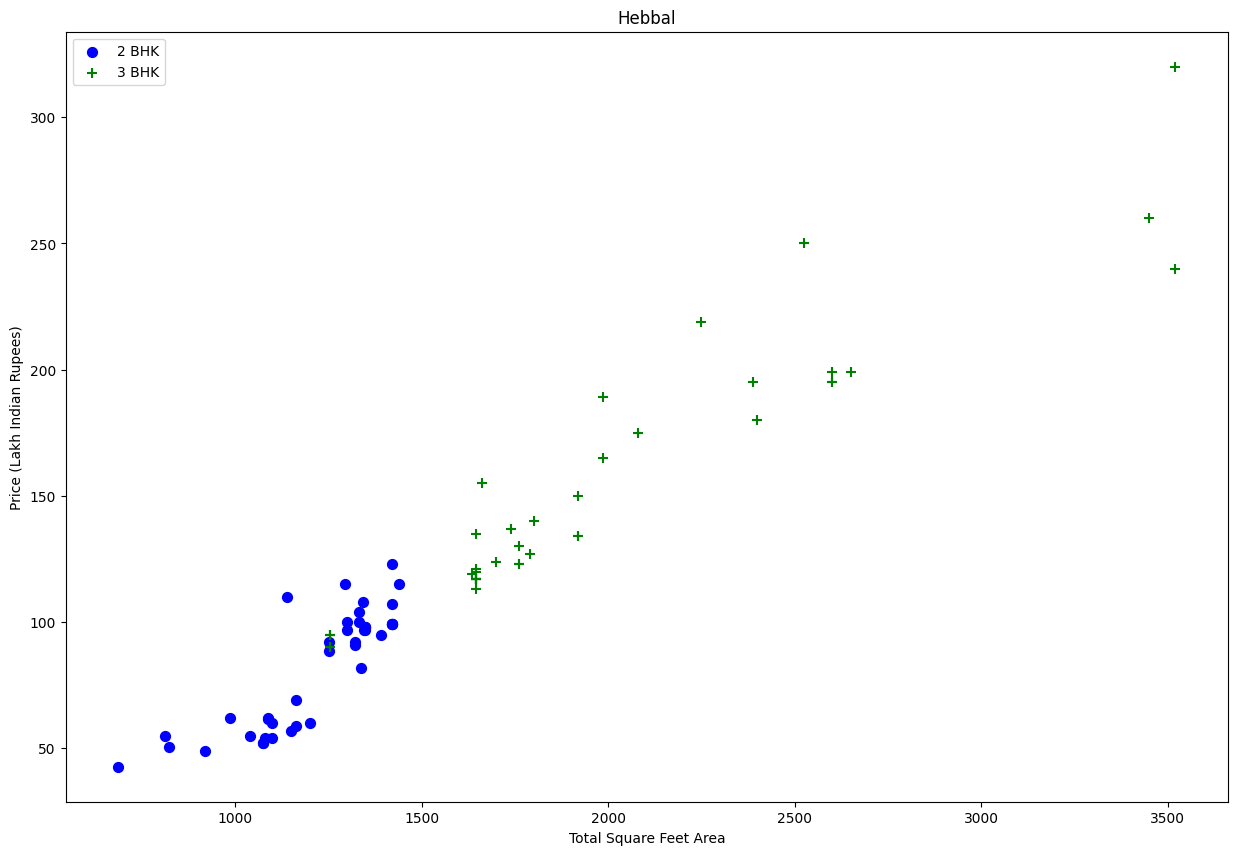

In [60]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

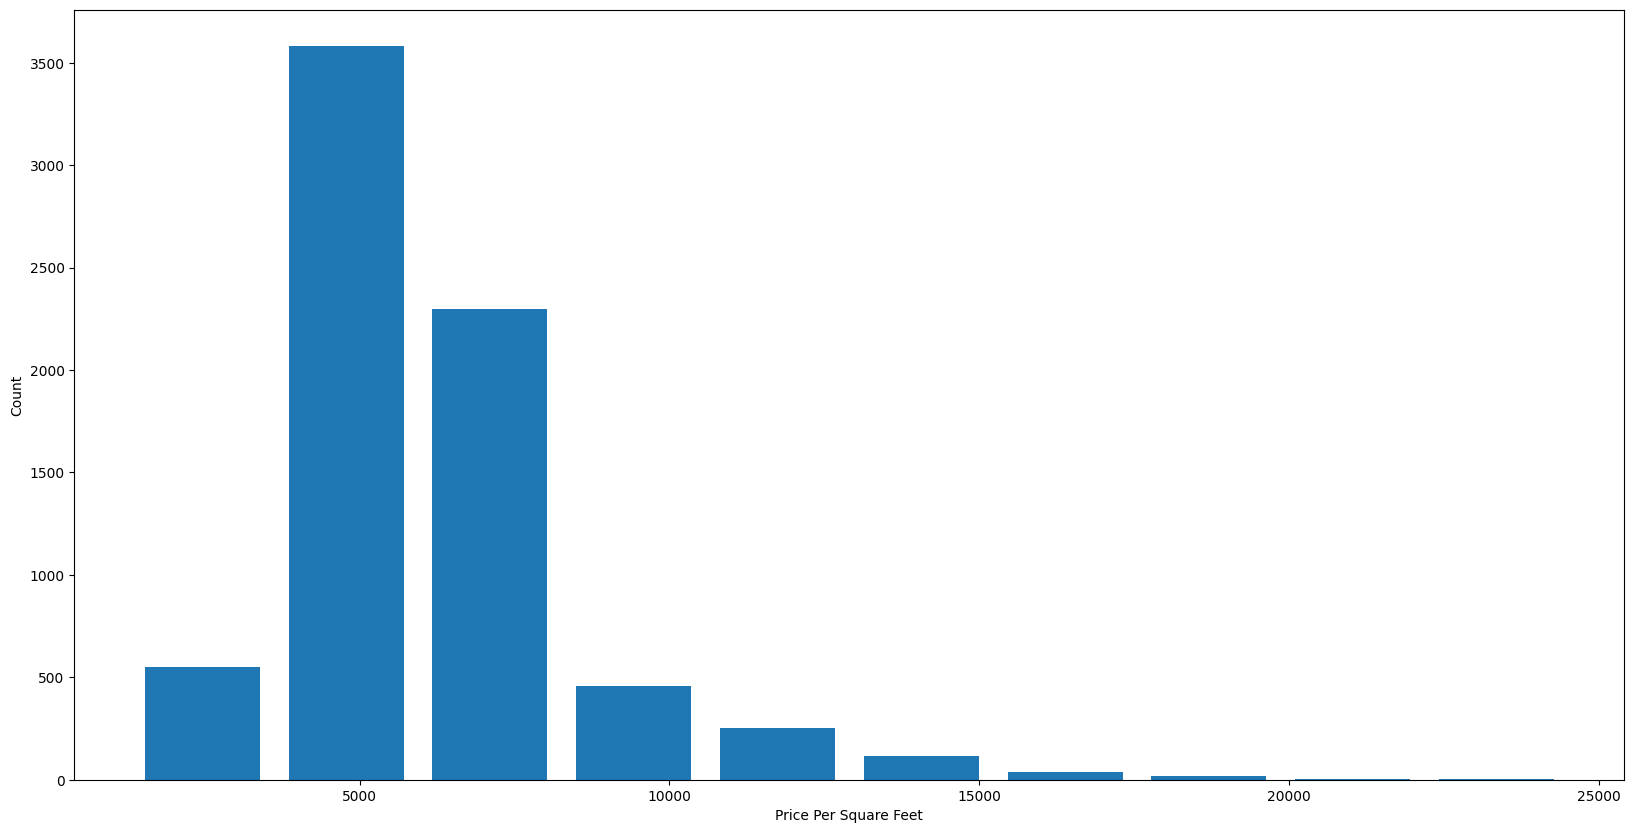

In [61]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [62]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

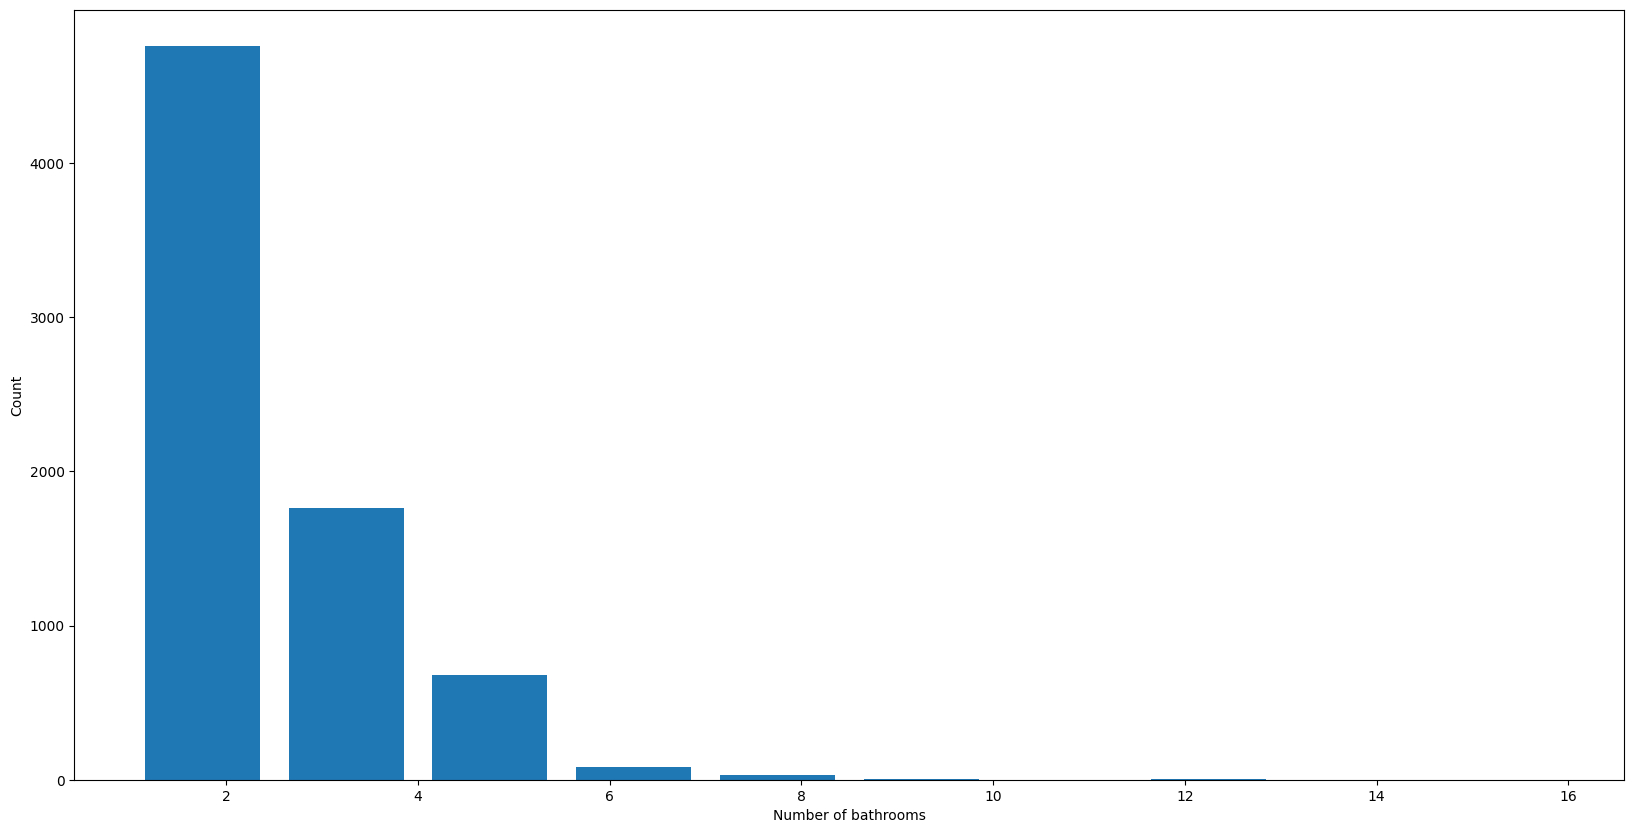

In [63]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [64]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [65]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [66]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [67]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


Remove Redundant Columns¶

In [68]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


One Hot Encoding

In [69]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Modeling¶

In [72]:
df12.shape

(7239, 244)

In [73]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
X.shape

(7239, 243)

In [75]:
y = df12.price
y.head(3)


0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [76]:
len(y)

7239

Train/Test Split

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229443

K Fold cross validation¶


In [79]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]  # Adjusted parameter
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
# df = find_best_model_using_gridsearchcv(X, y)
# print(df)


Testing the model

In [82]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [83]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258312098

In [84]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284986859

In [85]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.3119773317988

In [86]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854638

Export the model

In [87]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

Export location and column information for use later

In [88]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))


In [89]:
"""
from flask import Flask, request, jsonify
import util

#create an app
app = Flask(__name__)

#specify endpoint for getting all the locations from columns.json
@app.route('/get_location_names', methods=['GET'])
def get_location_names():
    response = jsonify({
        'locations': util.get_location_names()
    })
    response.headers.add('Access-Control-Allow-Origin', '*')

    return response

#collect the input and call the predict function
@app.route('/predict_home_price', methods=['GET', 'POST'])
def predict_home_price():
    total_sqft = float(request.form['total_sqft'])
    location = request.form['location']
    bhk = int(request.form['bhk'])
    bath = int(request.form['bath'])

    response = jsonify({
        'estimated_price': util.get_estimated_price(location,total_sqft,bhk,bath)
    })
    response.headers.add('Access-Control-Allow-Origin', '*')

    return response

#main function to run the app on a port
if __name__ == "__main__":
    print("Starting Python Flask Server For Home Price Prediction...")
    util.load_saved_artifacts()
    app.run()
"""

'\nfrom flask import Flask, request, jsonify\nimport util\n\n#create an app\napp = Flask(__name__)\n\n#specify endpoint for getting all the locations from columns.json\n@app.route(\'/get_location_names\', methods=[\'GET\'])\ndef get_location_names():\n    response = jsonify({\n        \'locations\': util.get_location_names()\n    })\n    response.headers.add(\'Access-Control-Allow-Origin\', \'*\')\n\n    return response\n\n#collect the input and call the predict function\n@app.route(\'/predict_home_price\', methods=[\'GET\', \'POST\'])\ndef predict_home_price():\n    total_sqft = float(request.form[\'total_sqft\'])\n    location = request.form[\'location\']\n    bhk = int(request.form[\'bhk\'])\n    bath = int(request.form[\'bath\'])\n\n    response = jsonify({\n        \'estimated_price\': util.get_estimated_price(location,total_sqft,bhk,bath)\n    })\n    response.headers.add(\'Access-Control-Allow-Origin\', \'*\')\n\n    return response\n\n#main function to run the app on a port\nif

In [90]:
"""
import pickle
import json
import numpy as np

__locations = None
__data_columns = None
__model = None

#do prediction
def get_estimated_price(location,sqft,bhk,bath):
    try:
        loc_index = __data_columns.index(location.lower())
    except:
        loc_index = -1

    x = np.zeros(len(__data_columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1 #one hot encoding

    return round(__model.predict([x])[0],2) #get the only element in x, prredict, and rounding

# create global variables and extract the related data and model from artifacts
def load_saved_artifacts():
    print("loading saved artifacts...start")
    global  __data_columns
    global __locations

    with open("./artifacts/columns.json", "r") as f:
        __data_columns = json.load(f)['data_columns']
        __locations = __data_columns[3:]  # first 3 columns are sqft, bath, bhk

    global __model
    if __model is None:
        with open('./artifacts/banglore_home_prices_model.pickle', 'rb') as f:
            __model = pickle.load(f)
    print("loading saved artifacts...done")

def get_location_names():
    return __locations

def get_data_columns():
    return __data_columns

#testing
if __name__ == '__main__':
    load_saved_artifacts()
    print(get_location_names())
    print(get_estimated_price('1st Phase JP Nagar',1000, 3, 3))
    print(get_estimated_price('1st Phase JP Nagar', 1000, 2, 2))
    print(get_estimated_price('Kalhalli', 1000, 2, 2)) # other location
    print(get_estimated_price('Ejipura', 1000, 2, 2))  # other location
"""

'\nimport pickle\nimport json\nimport numpy as np\n\n__locations = None\n__data_columns = None\n__model = None\n\n#do prediction\ndef get_estimated_price(location,sqft,bhk,bath):\n    try:\n        loc_index = __data_columns.index(location.lower())\n    except:\n        loc_index = -1\n\n    x = np.zeros(len(__data_columns))\n    x[0] = sqft\n    x[1] = bath\n    x[2] = bhk\n    if loc_index>=0:\n        x[loc_index] = 1 #one hot encoding\n\n    return round(__model.predict([x])[0],2) #get the only element in x, prredict, and rounding\n\n# create global variables and extract the related data and model from artifacts\ndef load_saved_artifacts():\n    print("loading saved artifacts...start")\n    global  __data_columns\n    global __locations\n\n    with open("./artifacts/columns.json", "r") as f:\n        __data_columns = json.load(f)[\'data_columns\']\n        __locations = __data_columns[3:]  # first 3 columns are sqft, bath, bhk\n\n    global __model\n    if __model is None:\n       

In [91]:
"""
Flask==1.0.2
numpy==1.16.2
scikit-learn==0.20.3
"""

'\nFlask==1.0.2\nnumpy==1.16.2\nscikit-learn==0.20.3\n'

In [92]:
"""
<!DOCTYPE html>
<html>
<head>
    <title>Banglore Home Price Prediction</title>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.1/jquery.min.js"></script>
    <script src="app.js"></script>
	<link rel="stylesheet" href="app.css">
</head>
<body>
<div class="img"></div>
<form class="form">
	<h2>Area (Square Feet)</h2>
    <input class="area"  type="text" id="uiSqft" class="floatLabel" name="Squareft" value="1000">
	<h2>BHK</h2>
	<div class="switch-field">
		<input type="radio" id="radio-bhk-1" name="uiBHK" value="1"/>
		<label for="radio-bhk-1">1</label>
		<input type="radio" id="radio-bhk-2" name="uiBHK" value="2" checked/>
		<label for="radio-bhk-2">2</label>
		<input type="radio" id="radio-bhk-3" name="uiBHK" value="3"/>
		<label for="radio-bhk-3">3</label>
		<input type="radio" id="radio-bhk-4" name="uiBHK" value="4"/>
		<label for="radio-bhk-4">4</label>
		<input type="radio" id="radio-bhk-5" name="uiBHK" value="5"/>
		<label for="radio-bhk-5">5</label>
	</div>
	</form>
<form class="form">
	<h2>Bath</h2>
	<div class="switch-field">
		<input type="radio" id="radio-bath-1" name="uiBathrooms" value="1"/>
		<label for="radio-bath-1">1</label>
		<input type="radio" id="radio-bath-2" name="uiBathrooms" value="2" checked/>
		<label for="radio-bath-2">2</label>
		<input type="radio" id="radio-bath-3" name="uiBathrooms" value="3"/>
		<label for="radio-bath-3">3</label>
		<input type="radio" id="radio-bath-4" name="uiBathrooms" value="4"/>
		<label for="radio-bath-4">4</label>
		<input type="radio" id="radio-bath-5" name="uiBathrooms" value="5"/>
		<label for="radio-bath-5">5</label>
	</div>
		<h2>Location</h2>
	<div>
  <select class="location" name="" id="uiLocations">
    <option value="" disabled="disabled" selected="selected">Choose a Location</option>
		<option>Electronic City</option>
        <option>Rajaji Nagar</option>
  </select>
</div>
	<button class="submit" onclick="onClickedEstimatePrice()" type="button">Estimate Price</button>
	<div id="uiEstimatedPrice" class="result">	<h2></h2> </div>
</body>
</html>
"""

'\n<!DOCTYPE html>\n<html>\n<head>\n    <title>Banglore Home Price Prediction</title>\n    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.1/jquery.min.js"></script>\n    <script src="app.js"></script>\n\t<link rel="stylesheet" href="app.css">\n</head>\n<body>\n<div class="img"></div>\n<form class="form">\n\t<h2>Area (Square Feet)</h2>\n    <input class="area"  type="text" id="uiSqft" class="floatLabel" name="Squareft" value="1000">\n\t<h2>BHK</h2>\n\t<div class="switch-field">\n\t\t<input type="radio" id="radio-bhk-1" name="uiBHK" value="1"/>\n\t\t<label for="radio-bhk-1">1</label>\n\t\t<input type="radio" id="radio-bhk-2" name="uiBHK" value="2" checked/>\n\t\t<label for="radio-bhk-2">2</label>\n\t\t<input type="radio" id="radio-bhk-3" name="uiBHK" value="3"/>\n\t\t<label for="radio-bhk-3">3</label>\n\t\t<input type="radio" id="radio-bhk-4" name="uiBHK" value="4"/>\n\t\t<label for="radio-bhk-4">4</label>\n\t\t<input type="radio" id="radio-bhk-5" name="uiBHK" value="5"/>\

In [ ]:
"""
@import url(https://fonts.googleapis.com/css?family=Roboto:300);

.switch-field {
	display: flex;
	margin-bottom: 36px;
	overflow: hidden;
}

.switch-field input {
	position: absolute !important;
	clip: rect(0, 0, 0, 0);
	height: 1px;
	width: 1px;
	border: 0;
	overflow: hidden;
}

.switch-field label {
	background-color: #e4e4e4;
	color: rgba(0, 0, 0, 0.6);
	font-size: 14px;
	line-height: 1;
	text-align: center;
	padding: 8px 16px;
	margin-right: -1px;
	border: 1px solid rgba(0, 0, 0, 0.2);
	box-shadow: inset 0 1px 3px rgba(0, 0, 0, 0.3), 0 1px rgba(255, 255, 255, 0.1);
	transition: all 0.1s ease-in-out;
}

.switch-field label:hover {
	cursor: pointer;
}

.switch-field input:checked + label {
	background-color: #a5dc86;
	box-shadow: none;
}

.switch-field label:first-of-type {
	border-radius: 4px 0 0 4px;
}

.switch-field label:last-of-type {
	border-radius: 0 4px 4px 0;
}

.form {
	max-width: 270px;
	font-family: "Lucida Grande", Tahoma, Verdana, sans-serif;
	font-weight: normal;
	line-height: 1.625;
	margin: 8px auto;
	padding-left: 16px;
	z-index: 2;
}

h2 {
	font-size: 18px;
	margin-bottom: 8px;
}
.area{
  font-family: "Roboto", sans-serif;
  outline: 0;
  background: #f2f2f2;
  width: 76%;
  border: 0;
  margin: 0 0 10px;
  padding: 10px;
  box-sizing: border-box;
  font-size: 15px;
  height: 35px;
  border-radius: 5px;
}

.location{
  font-family: "Roboto", sans-serif;
  outline: 0;
  background: #f2f2f2;
  width: 76%;
border: 0;
  margin: 0 0 10px;
  padding: 10px;
  box-sizing: border-box;
  font-size: 15px;
  height: 40px;
  border-radius: 5px;
}

.submit{
  background: #a5dc86;
  width: 76%;
  border: 0;
  margin: 25px 0 10px;
  box-sizing: border-box;
  font-size: 15px;
	height: 35px;
	text-align: center;
	border-radius: 5px;
}

.result{
		background: #dcd686;
		width: 76%;
		border: 0;
		margin: 25px 0 10px;
		box-sizing: border-box;
		font-size: 15px;
		height: 35px;
		text-align: center;
}

.img {
  background: url('https://images.unsplash.com/photo-1564013799919-ab600027ffc6?ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80');
	background-repeat: no-repeat;
  background-size: auto;
  background-size:100% 100%;
  -webkit-filter: blur(5px);
  -moz-filter: blur(5px);
  -o-filter: blur(5px);
  -ms-filter: blur(5px);
  filter: blur(15px);
  position: fixed;
  width: 100%;
  height: 100%;
  top: 0;
  left: 0;
  z-index: -1;
}

body, html {
  height: 100%;
}
"""

In [93]:
"""
// get user input values
function getBathValue() {
  var uiBathrooms = document.getElementsByName("uiBathrooms");
  for(var i in uiBathrooms) {
    if(uiBathrooms[i].checked) {
        return parseInt(i)+1;
    }
  }
  return -1; // Invalid Value
}

// get user input values
function getBHKValue() {
  var uiBHK = document.getElementsByName("uiBHK");
  for(var i in uiBHK) {
    if(uiBHK[i].checked) {
        return parseInt(i)+1;
    }
  }
  return -1; // Invalid Value
}
//make POST Request for prediction
function onClickedEstimatePrice() {
  console.log("Estimate price button clicked");
  var sqft = document.getElementById("uiSqft");
  var bhk = getBHKValue();
  var bathrooms = getBathValue();
  var location = document.getElementById("uiLocations");
  var estPrice = document.getElementById("uiEstimatedPrice");

  // var url = "http://127.0.0.1:5000/predict_home_price"; //Use this if you are NOT using nginx which is first 7 tutorials
  var url = "/api/predict_home_price"; // Use this if  you are using nginx. i.e tutorial 8 and onwards

  $.post(url, {
      total_sqft: parseFloat(sqft.value),
      bhk: bhk,
      bath: bathrooms,
      location: location.value
  },function(data, status) {
      console.log(data.estimated_price);
      estPrice.innerHTML = "<h2>" + data.estimated_price.toString() + " Lakh</h2>";
      console.log(status);
      });
}

// populate the drop down menu for locations
function onPageLoad() {
  console.log( "document loaded" );
  // var url = "http://127.0.0.1:5000/get_location_names"; // Use this if you are NOT using nginx which is first 7 tutorials
  var url = "/api/get_location_names"; // Use this if  you are using nginx. i.e tutorial 8 and onwards
  $.get(url,function(data, status) {
      console.log("got response for get_location_names request");
      if(data) {
          var locations = data.locations;
          var uiLocations = document.getElementById("uiLocations");
          $('#uiLocations').empty();
          for(var i in locations) {
              var opt = new Option(locations[i]);
              $('#uiLocations').append(opt);
          }
      }
  });
}

window.onload = onPageLoad;
"""


'\n// get user input values\nfunction getBathValue() {\n  var uiBathrooms = document.getElementsByName("uiBathrooms");\n  for(var i in uiBathrooms) {\n    if(uiBathrooms[i].checked) {\n        return parseInt(i)+1;\n    }\n  }\n  return -1; // Invalid Value\n}\n\n// get user input values\nfunction getBHKValue() {\n  var uiBHK = document.getElementsByName("uiBHK");\n  for(var i in uiBHK) {\n    if(uiBHK[i].checked) {\n        return parseInt(i)+1;\n    }\n  }\n  return -1; // Invalid Value\n}\n//make POST Request for prediction\nfunction onClickedEstimatePrice() {\n  console.log("Estimate price button clicked");\n  var sqft = document.getElementById("uiSqft");\n  var bhk = getBHKValue();\n  var bathrooms = getBathValue();\n  var location = document.getElementById("uiLocations");\n  var estPrice = document.getElementById("uiEstimatedPrice");\n\n  // var url = "http://127.0.0.1:5000/predict_home_price"; //Use this if you are NOT using nginx which is first 7 tutorials\n  var url = "/api/pr

In [94]:
"""
server {
    listen 80;
        server_name bhp;
        root /home/ubuntu/BangloreHomePrices/client;
        index app.html;
        location /api/ {
             rewrite ^/api(.*) $1 break;
             proxy_pass http://127.0.0.1:5000;
        }
}
"""


'\nserver {\n    listen 80;\n        server_name bhp;\n        root /home/ubuntu/BangloreHomePrices/client;\n        index app.html;\n        location /api/ {\n             rewrite ^/api(.*) $1 break;\n             proxy_pass http://127.0.0.1:5000;\n        }\n}\n'

In [95]:
import numpy as np

# Assuming 'df12' is your preprocessed DataFrame
median_price = df12['price'].median()
df12['price_category'] = np.where(df12['price'] >= median_price, 1, 0)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Dropping the original 'price' column and preparing features and target
X = df12.drop(['price', 'price_category'], axis=1)
y = df12['price_category']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy and display confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9033149171270718
Confusion Matrix:
 [[654  54]
 [ 86 654]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


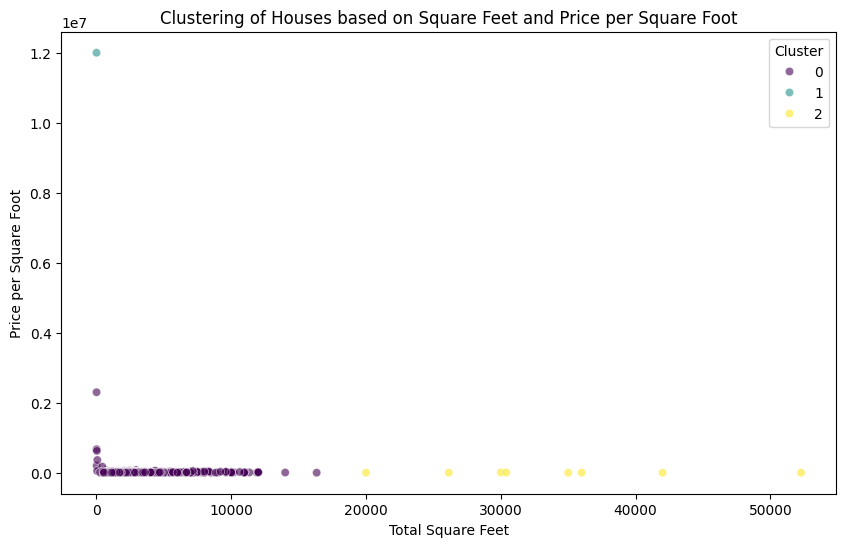

In [96]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned and preprocessed DataFrame
# df5 = pd.read_csv('path_to_your_preprocessed_data.csv')

# Assuming 'total_sqft' and 'price_per_sqft' are the features you want to cluster
features = df5[['total_sqft', 'price_per_sqft']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # You can change the number of clusters based on your data and needs
clusters = kmeans.fit_predict(features_scaled)
df5['Cluster'] = clusters  # Adding the cluster IDs to the original DataFrame

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df5, x='total_sqft', y='price_per_sqft', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clustering of Houses based on Square Feet and Price per Square Foot')
plt.xlabel('Total Square Feet')
plt.ylabel('Price per Square Foot')
plt.legend(title='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


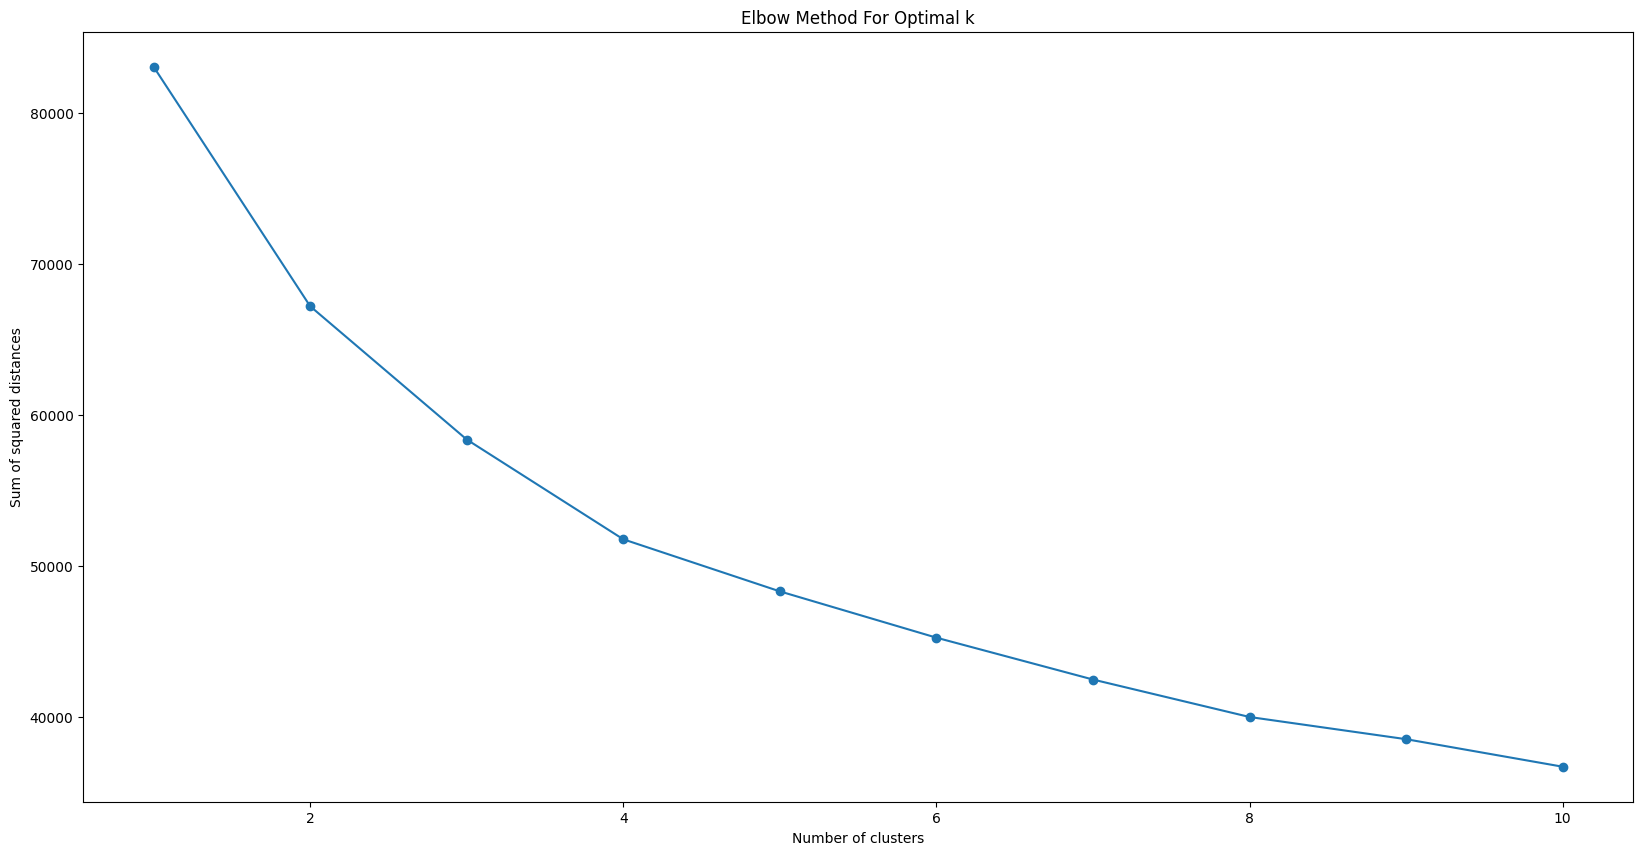

           total_sqft      bath   balcony        price
Cluster                                               
0         2848.092488  5.066744  1.745275   298.337205
1         1166.653914  2.099400  0.840501    68.780350
2         1160.406535  1.992967  2.124123    58.548165
3         1650.957383  2.879073  2.229187   107.209629
4        13398.066667  5.377778  1.955834  1606.444444


In [104]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Bengaluru_House_Data.csv'  # Ensure this path is correct for your environment
data = pd.read_csv(file_path)

# Function to convert total_sqft to a single numeric value
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return np.nan

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data['total_sqft'] = imputer.fit_transform(data[['total_sqft']])
data['bath'] = imputer.fit_transform(data[['bath']])
data['balcony'] = imputer.fit_transform(data[['balcony']])

# Select features and preprocess
numerical_features = ['total_sqft', 'bath', 'balcony', 'price']
categorical_features = ['area_type', 'location', 'size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit the preprocessor and transform the data
X_transformed = preprocessor.fit_transform(data)

# Perform the elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_transformed)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k to find the elbow
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Assuming from the elbow plot that the optimal number of clusters is 4
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(X_transformed)
data['Cluster'] = clusters  # Ensure this line executes correctly

# Analyze the clusters by calculating means only on numerical columns
cluster_means = data.groupby('Cluster')[numerical_features].mean()
print(cluster_means)


In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = 'Bengaluru_House_Data.csv'
data = pd.read_csv(file_path)

# Function to convert total_sqft to a single numeric value
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return np.nan

# Apply the conversion function to the entire 'total_sqft' column
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

# Drop rows with NaN values in 'total_sqft' if any
data = data.dropna(subset=['total_sqft'])

# Impute missing values in other columns
imputer = SimpleImputer(strategy='mean')
data['bath'] = imputer.fit_transform(data[['bath']])
data['balcony'] = imputer.fit_transform(data[['balcony']])

# Select features and preprocess
numerical_features = ['total_sqft', 'bath', 'balcony']
categorical_features = ['area_type', 'location', 'size']
target = 'price'

# Splitting the features and the target
X = data[numerical_features + categorical_features]
y = data[target]

# Define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessing the data
X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Neural network architecture for regression
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))  # No activation for the output layer in regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
evaluation = model.evaluate(X_test, y_test)

# Make predictions on the test data
predictions = model.predict(X_test)

# Compare actual vs predicted values (assuming y_test is a pandas Series)
actual_vs_predicted = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions.flatten()})
print(actual_vs_predicted.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               171520    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 179841 (702.50 KB)
Trainable params: 179841 (702.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
26